# Poverty in Paris urban area

!!! This function renders only package's internal data, it might not be the most up-to-date
Have a look at api.insee.fr !!!
!!! This function renders only package's internal data, it might not be the most up-to-date
Have a look at api.insee.fr !!!
Getting data:   0%|          | 0/434 [00:00<?, ?it/s]!!! This function is still at an early development stage,
future changes are likely !!!
Getting data:   6%|▌         | 24/434 [00:12<03:24,  2.01it/s]
API query number limit reached - function might be slowed down
Getting data: 100%|█████████▉| 433/434 [14:39<00:01,  1.08s/it]!!! Wrong query or api.insee.fr error !!!
Error 404
Getting data: 100%|██████████| 434/434 [14:39<00:00,  2.03s/it]!!! Wrong query or api.insee.fr error !!!
Error 404

!!! Geographic data on arrondissements municipaux come from another source,
therefore small gaps may be visible !!!


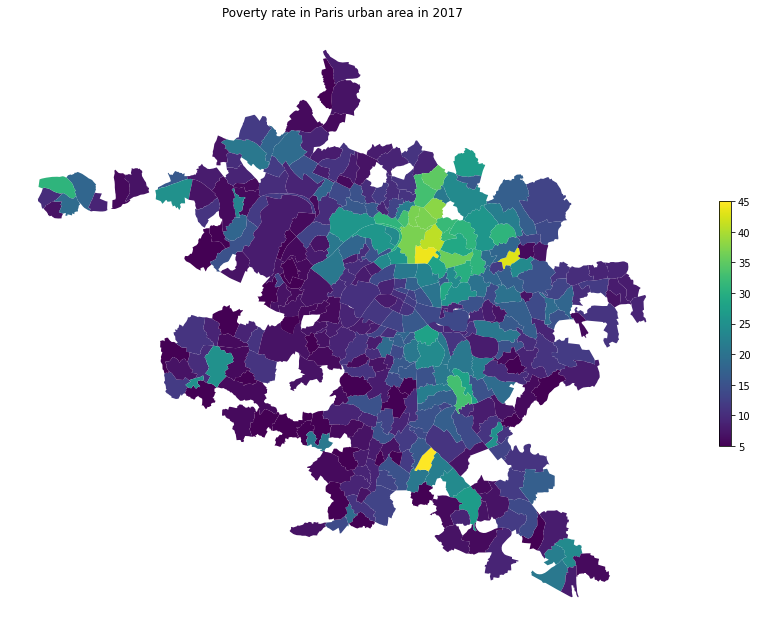

In [1]:
# Subscribe to api.insee.fr and get your credentials!
# Beware : any change to the keys should be tested after having cleared the cache
# Please do : from pynsee.utils import *; clear_all_cache()
# Advice : add the following lines to 'pynsee_api_credentials.py' file in your HOME directory
# to avoid running them manually
import os
os.environ['insee_key'] = "my_key"
os.environ['insee_secret'] = "my_secret_key"

from pynsee.localdata import *

import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import descartes

# get a list all data available : datasets and variables
metadata = get_local_metadata()

# geographic metadata
nivgeo = get_nivgeo_list()

# get geographic area list
area = get_area_list()

# get all communes in Paris urban area
areaParis = get_included_area('unitesUrbaines2020', ['00851'])

# get selected communes identifiers
code_com_paris = areaParis.code.to_list()

# get numeric values from INSEE database 
dataParis = get_insee_local(dataset='GEO2020FILO2017',
                       variables =  'INDICS_FILO_DISP_DET',
                       geo = 'COM',
                       geocodes = code_com_paris)

#select poverty rate data, exclude paris commune
data_plot = dataParis.loc[dataParis.UNIT=='TP60']
data_plot = data_plot.loc[data_plot.CODEGEO!='75056']

#get communes limits
map_com = get_map('communes')
map_arr_mun = get_map('arrondissements-municipaux')
map_idf = pd.concat([map_com, map_arr_mun])

# merge values and geographic limits
mapparis = map_idf.merge(data_plot, how = 'right',
                     left_on = 'code', right_on = 'CODEGEO')

#plot
fig, ax = plt.subplots(1,1,figsize=[15,15])
mapparis.plot(column='OBS_VALUE', cmap=cm.viridis, 
    legend=True, ax=ax, legend_kwds={'shrink': 0.3})
ax.set_axis_off()
ax.set(title='Poverty rate in Paris urban area in 2017')
plt.show()
fig.savefig('poverty_paris_urban_area.svg',
            format='svg', dpi=1200,
            bbox_inches = 'tight',
            pad_inches = 0)
